# Hands-on Machine Learning Chapter 4
# Logistic Regression

## Standard Imports

In [1]:
# Is Python v. 3.5 or above available?
import sys
assert sys.version_info >= (3, 5)

# Is scikit-learn version >= 0.20?
import sklearn
assert sklearn.__version__ >= "0.20"

# For manipulating numbers and files
import numpy as np
import os

# Make this notebook's output stable across runs
np.random.seed(42)

# Plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Logistic Regression - Iris Dataset

Will attempt to train a simple logisitic regression classifier to identify only the Iris-Virginica type of Iris flower based on the petal width feature only. 

To do this, must first extract the petal width feature (and only this feature), and also use one-vs-all classification: the target class will be 1 in all cases where the training sample is of the required class ('Iris Virginica') and 0 for others.

In [2]:
from sklearn import datasets

In [3]:
# Iris dataset is built into sklearn
iris = datasets.load_iris()

In [4]:
# What are the names of the `columns` in this data?
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [19]:
# Confirimg that the feature at index 3 is actually the petal width
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
# Extracting the petal width for all training samples
X = iris['data'][:, 3:]  # : is necessary because of numpy shape

In [21]:
# 1 is Iris-Virginica, else 0
y = (iris['target'] == 2).astype(np.int)

### Training a Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_reg = LogisticRegression()

In [24]:
# As simple as fit
log_reg.fit(X, y)

/Users/saadmashkoor/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

We didn't create a test or validation set, so instead we'll test our model by examining it's predicted probabilities for for petal widths varying from 0 cm to 3 cm.

In [25]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [26]:
y_proba = log_reg.predict_proba(X_new)

Text(0, 0.5, 'Predicted Probability')

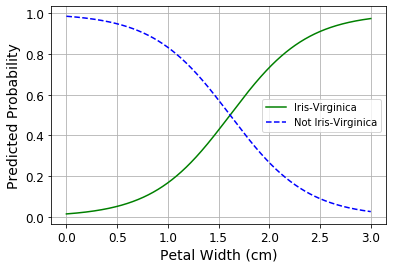

In [30]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')
plt.grid()
plt.legend()
plt.xlabel('Petal Width (cm)')
plt.ylabel('Predicted Probability')

For petal widths greater than 2 cm, the classifier is quite confident that the the flower will be of the Iris-Virginica variety. Below 1 cm, it is highly confident that the flower is **not** Iris-Virginca.

Between these two extremes, the model is not quite as sure about one class over another, but if asked to predict a **class** rather than a **probability**, it will predict the class with the highest probability.

The decision boundary is at **1.6 cm** - at any petal widths above 1.6 cm, the classifier predicts class 1 while below it, the predicted class is 0.

In [31]:
# Can confirm this decision boundary 
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Logistic Regression with More Features

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
X = iris['data'][:, (2, 3)]     # Petal length, petal width
y = (iris['target'] == 2).astype(np.int)

In [41]:
# Initialise a logistic regression model with specific solver for optimal solution
log_reg = LogisticRegression(solver='lbfgs', 
                             C=10 ** 10, # Regularization parameter
                             random_state=42)

In [42]:
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [43]:
# Create a linearly spaced 2D grid of values for the features
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1), 
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)

In [44]:
# Unraveling the values of x0 and x1  to form a two-dimensional grid
X_new = np.c_[x0.ravel(), x1.ravel()]

In [45]:
# Predicting probabilities for grid of petal lengths and widths 
y_proba = log_reg.predict_proba(X_new)

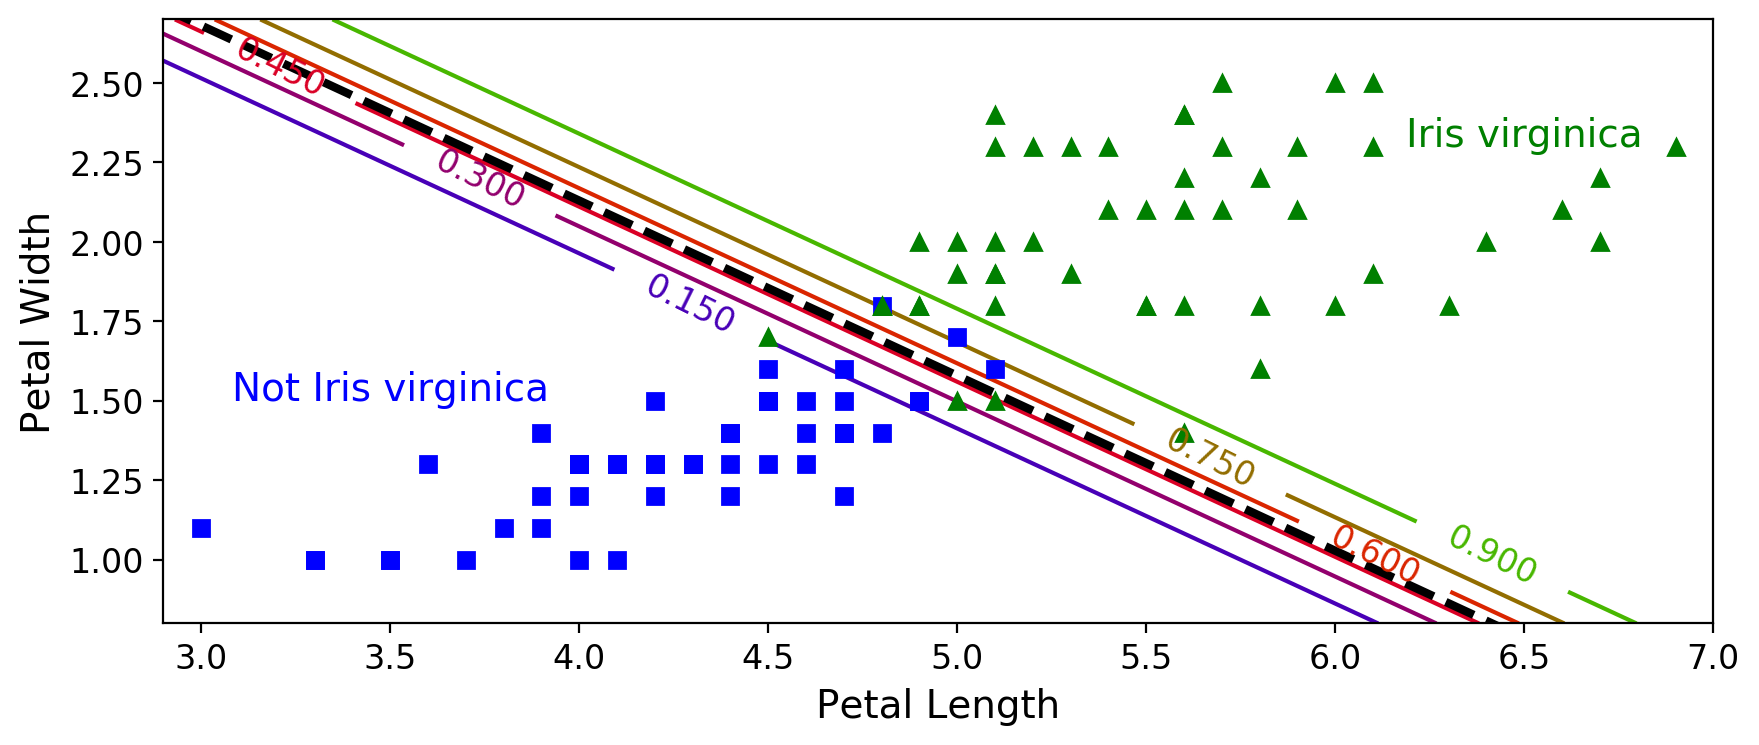

In [50]:
# Plotting predicted probabilities for each combo
plt.figure(figsize=(10, 4), dpi=200)

# Plot blue squares for all values of X for which y is 0 
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')

# Plot green triangles for all values of X for which y is 1
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')

# Not sure what's happening here
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

# Left and right x-axis limits
left_right = np.array([2.9, 7])

# Logistic regression decision boundary 
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

# Contour labels
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, 'k--', linewidth=3)
plt.text(3.5, 1.5, 'Not Iris virginica', fontsize=14, color='b', ha='center')
plt.text(6.5, 2.3, 'Iris virginica', fontsize=14, color='g', ha='center')
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

The decision boundary of this logistic regression model is linear. Each parallel line shows the predicted probability along that combination of petal length and petal widths: it increases from 15% at the very bottom to 90% at the very top. 

The thick, black, dotted line represents the decision boundary at which the model is 50% sure that a given data point belongs to class 1 or 0.